In [51]:
import pandas as pd

In [52]:
df_data = pd.read_json("SRC/data.json")
df_label = pd.read_csv("SRC/label.csv")
df_cat = pd.read_csv("SRC/categories_string.csv")

In [53]:
df_cat

0   1
0              pastor   0
1               model   1
2        yoga_teacher   2
3             teacher   3
4    personal_trainer   4
5             painter   5
6          journalist   6
7   interior_designer   7
8             surgeon   8
9          accountant   9
10                 dj  10
11          physician  11
12           comedian  12
13  software_engineer  13
14              nurse  14
15               poet  15
16            dentist  16
17       chiropractor  17
18          filmmaker  18
19          professor  19
20       photographer  20
21             rapper  21
22       psychologist  22
23          paralegal  23
24          architect  24
25           composer  25
26           attorney  26
27          dietitian  27

In [54]:
df_label

Id  Category
0            0        19
1            1         9
2            2        19
3            3        24
4            4        24
...        ...       ...
217192  217192        19
217193  217193        22
217194  217194        19
217195  217195        19
217196  217196         1

[217197 rows x 2 columns]

In [55]:
df_label_cat = df_label.set_index('Category').join(df_cat.set_index('1'))

In [56]:
df_label_cat

Id          0
0      279     pastor
0      353     pastor
0      356     pastor
0      363     pastor
0      633     pastor
..     ...        ...
27  216833  dietitian
27  216866  dietitian
27  216945  dietitian
27  216961  dietitian
27  217089  dietitian

[217197 rows x 2 columns]

In [57]:
df_label_cat_data = df_data.set_index('Id').join(df_label_cat.set_index('Id'))

In [58]:
df_label_cat_data

description gender             0
Id                                                                            
0        She is also a Ronald D. Asmus Policy Entrepre...      F     professor
1        He is a member of the AICPA and WICPA. Brent ...      M    accountant
2        Dr. Aster has held teaching and research posi...      M     professor
3        He runs a boutique design studio attending cl...      M     architect
4        He focuses on cloud security, identity and ac...      M     architect
...                                                   ...    ...           ...
217192   A member of the UWA Cultural Collections Boar...      M     professor
217193   Kelly has worked globally leading teams of co...      F  psychologist
217194   He's the lead author of a recent study that f...      M     professor
217195   She specializes in the theoretical and pedago...      F     professor
217196   Since she was 10 years old she has become a m...      F         model

[217197 rows x 3 columns]

In [59]:
df_label_cat_data.rename(columns={'0': 'job'}, inplace=True)

In [64]:
DATA = df_label_cat_data

In [65]:
DATA

description gender           job
Id                                                                            
0        She is also a Ronald D. Asmus Policy Entrepre...      F     professor
1        He is a member of the AICPA and WICPA. Brent ...      M    accountant
2        Dr. Aster has held teaching and research posi...      M     professor
3        He runs a boutique design studio attending cl...      M     architect
4        He focuses on cloud security, identity and ac...      M     architect
...                                                   ...    ...           ...
217192   A member of the UWA Cultural Collections Boar...      M     professor
217193   Kelly has worked globally leading teams of co...      F  psychologist
217194   He's the lead author of a recent study that f...      M     professor
217195   She specializes in the theoretical and pedago...      F     professor
217196   Since she was 10 years old she has become a m...      F         model

[217197 rows x 3 columns]

In [170]:
DATA2 = DATA.groupby(["job", "gender"], as_index=False).count()
DATA2.rename(columns={'description': 'nb'}, inplace=True)
DATA2[DATA2.gender == "F"][["job", "nb"]]

job     nb
0          accountant   1129
2           architect   1314
4            attorney   7106
6        chiropractor    391
8            comedian    345
10           composer    553
12            dentist   1895
14          dietitian   2120
16                 dj    125
18          filmmaker   1394
20  interior_designer    694
22         journalist   6123
24              model   3398
26              nurse  11493
28            painter   2131
30          paralegal    814
32             pastor    360
34   personal_trainer    364
36       photographer   5129
38          physician   4581
40               poet   2153
42          professor  31424
44       psychologist   6418
46             rapper     64
48  software_engineer    613
50            surgeon    890
52            teacher   5420
54       yoga_teacher    803

In [178]:
F_job = DATA2[DATA2.gender == "F"]["job"]
F_nb = DATA2[DATA2.gender == "F"]["nb"]
M_job = DATA2[DATA2.gender == "M"]["job"]
M_nb = DATA2[DATA2.gender == "M"]["nb"]

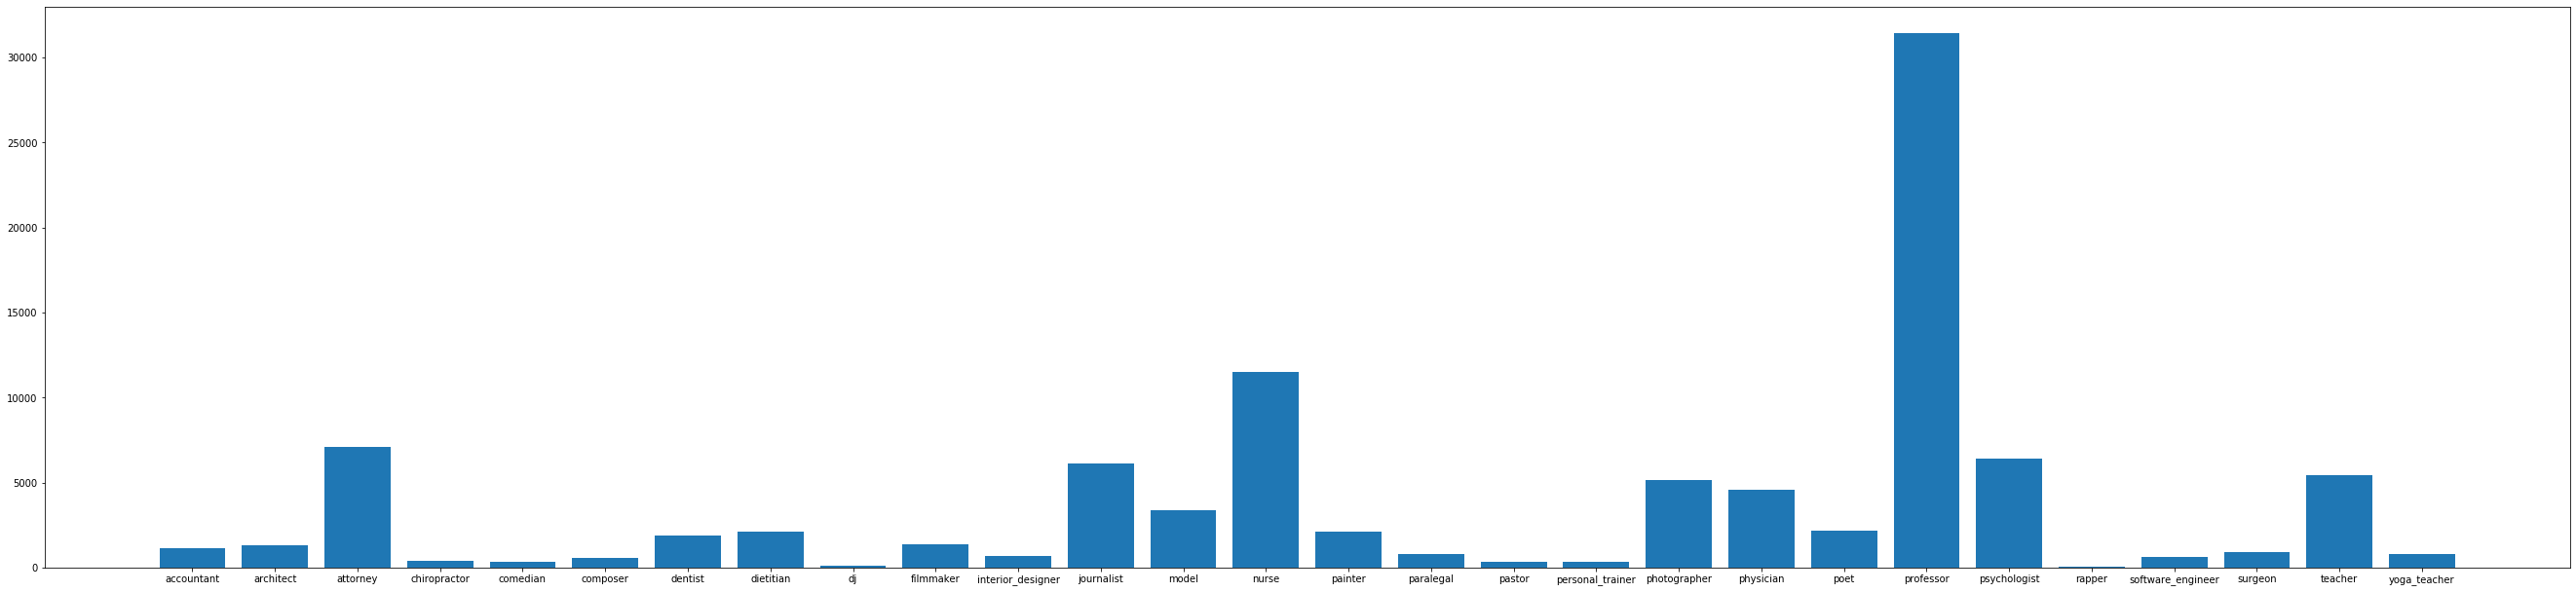

In [177]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,6,2])
ax.bar(F_job,F_nb)
plt.show()

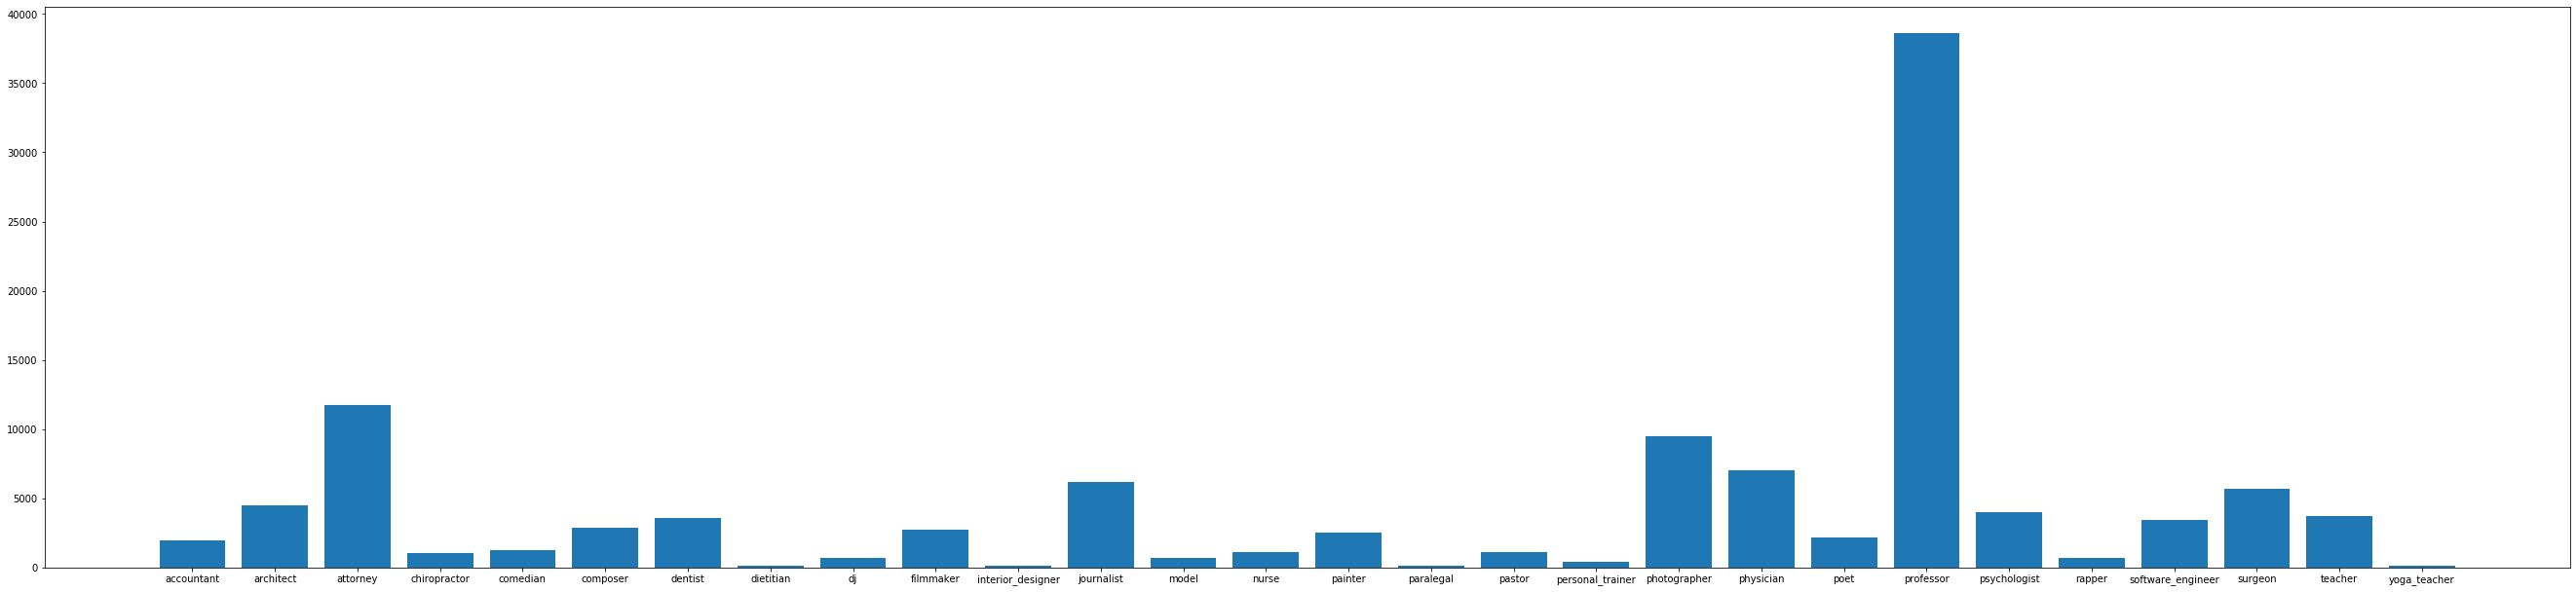

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,6,2])
ax.bar(M_job,M_nb)
plt.show()

description
job                           
accountant                   1
architect                    1
attorney                     1
chiropractor                 1
comedian                     1
composer                     1
dentist                      1
dietitian                    1
dj                           1
filmmaker                    1
interior_designer            1
journalist                   1
model                        1
nurse                        1
painter                      1
paralegal                    1
pastor                       1
personal_trainer             1
photographer                 1
physician                    1
poet                         1
professor                    1
psychologist                 1
rapper                       1
software_engineer            1
surgeon                      1
teacher                      1
yoga_teacher                 1